In [48]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# 👩‍💻 Workbook 02: String and list manipulation

This workbook is about learning how to manually manipulate string data that is read from files.

To do this, you will be reading data from three files: "beam_1.txt", "beam_2.txt", and "beam_3.txt".

The file format of each text file is as follows. Values shown in square brackets `[]` are optional data and may or may not appear in the file. Information shown in parentheses `()` is information on how the data is stored.

```
Length, [E, I]
Support locations (comma separated)
Load Magnitude, Load Start, Load Order, [Load End]
Load Magnitude, Load Start, Load Order, [Load End]
...
```

All the lines below the first two lines will be loads. There can be zero, one, or many lines of loads.


# Task 1

Using the template for opening a file shown in the lesson (and also shown in the Lesson 01 Reference), open the file "beam_1.txt" in the repository.

1. Read the contents of the file using `.read()` and store the resulting string in a variable called `beam_1_data`.
2. Using the information about the file format described above, use string methods, list methods, and indexing to extract data from the file. Create the following variables:
* `length`
* `E`
* `I`
* Supports
    * Create separate variables for each support location, e.g. `support_location_1`, `support_location_2`, etc.
    * `support_location_...`
* Loads
    * Create separate variables for each load, e.g. `load_magnitude_1`, `load_magnitude_2`, etc.
    * `load_magnitude_...`
    * `load_start_...`
    * `load_order_...`
    * `load_end_...` (if applicable)

3. Create a new `Beam` object using the variables containing the data you read from the file. **Assume all supports are vertical point loads supports.** _Remember_, in addition to creating a sympy `symbol` for each unknown, you will also need to create a `.bc_deflection` list of restraints.
3. Solve the `Beam` for reaction loads. Print reaction loads, plot the shear force and bending moment diagrams. If `E` and `I` are in the file, also plot the displacement.

(Feel free to refer back to Lesson 01 Reference and Workbook 01 if you don't remember how to build the `Beam` objects)

## Task 01 Response

{R1: 112000/3, R2: -952000/3}


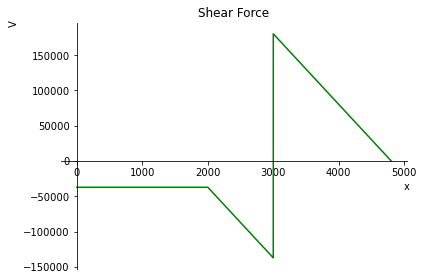

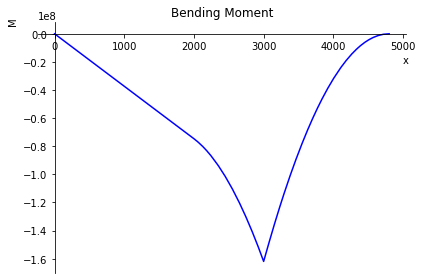

In [49]:
with open("beam_1.txt", 'r') as file:
    beam_1_data = file.read()
    
b1_lines = beam_1_data.split("\n")
    
length = beam_1_data.split("\n")[0]
length = int(length)

support_location_1 = b1_lines[1].split(",")[0]
support_location_2 = b1_lines[1].split(",")[1]
support_location_1 = int(support_location_1)
support_location_2 = int(support_location_2)

load_magnitude_1 = b1_lines[2].split(",")[0]
load_start_1 = b1_lines[2].split(",")[1]
load_order_1 = b1_lines[2].split(",")[2]

load_magnitude_1 = int(load_magnitude_1)
load_start_1 = int(load_start_1)
load_order_1 = int(load_order_1)

E, I = symbols("E I")
R1, R2 = symbols("R1 R2")

b1_beam = Beam(length, E, I)
b1_beam.apply_load(R1, support_location_1, -1)
b1_beam.apply_load(R2, support_location_2, -1)
b1_beam.apply_load(load_magnitude_1, load_start_1, load_order_1)
b1_beam.bc_deflection = [(support_location_1, 0), (support_location_2, 0)]

b1_beam.solve_for_reaction_loads(*[R1, R2])
print(b1_beam.reaction_loads)
b1_beam.plot_shear_force()
b1_beam.plot_bending_moment()

# Task 2

Perform the same instructions from **Task 1** with "beam_2.txt" except call your variable `beam_2_data`.

## Task 2 Response

{R1: -60167.8462221345, R2: -15610.0506756757, R3: -38222.1031021898}


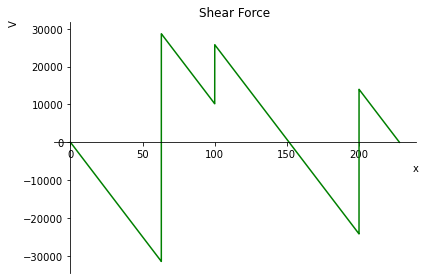

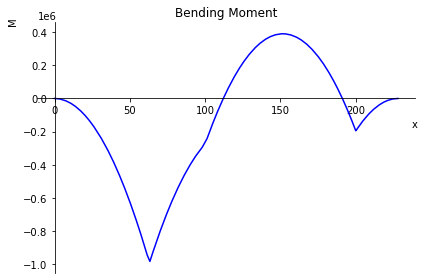

In [52]:
with open("beam_2.txt", 'r') as file:
    beam_2_data = file.read()
    
b2_lines = beam_2_data.split("\n")
    
length, E, I = b2_lines[0].split(", ")
length = int(length)

support_location_1 = b2_lines[1].split(", ")[0]
support_location_2 = b2_lines[1].split(",")[1]
support_location_3 = b2_lines[1].split(", ")[2]

support_location_1 = int(support_location_1)
support_location_2 = int(support_location_2)
support_location_3 = int(support_location_3)

load_magnitude_1 = b2_lines[2].split(",")[0]
load_start_1 = b2_lines[2].split(",")[1]
load_order_1 = b2_lines[2].split(",")[2]

load_magnitude_1 = float(load_magnitude_1)
load_start_1 = int(load_start_1)
load_order_1 = int(load_order_1)

load_magnitude_2 = b2_lines[3].split(",")[0]
load_start_2 = b2_lines[3].split(",")[1]
load_order_2 = b2_lines[3].split(",")[2]

load_magnitude_2 = float(load_magnitude_2)
load_start_2 = int(load_start_2)
load_order_2 = int(load_order_2)


R1, R2, R3 = symbols("R1 R2 R3")

b2_beam = Beam(length, E, I)
b2_beam.apply_load(R1, support_location_1, -1)
b2_beam.apply_load(R2, support_location_2, -1)
b2_beam.apply_load(R3, support_location_3, -1)
b2_beam.apply_load(load_magnitude_1, load_start_1, load_order_1)
b2_beam.apply_load(load_magnitude_2, load_start_2, load_order_2)
b2_beam.bc_deflection = [(support_location_1, 0), (support_location_2, 0), (support_location_3, 0)]

b2_beam.solve_for_reaction_loads(*[R1, R2, R3])
print(b2_beam.reaction_loads)
b2_beam.plot_shear_force()
b2_beam.plot_bending_moment()

## Task 3

1. Make a duplicate of the file "beam_1.txt" and call it "beam_3.txt". 
2. Make a duplicate of "beam_2.txt" and call it "beam_4.txt"
3. Rename the title of **Task 01** to **Beam: Two supports, one load**
4. Rename the title of **Task 02** to **Beam: Three supports, two loads**
5. Change some of the values in "beam_3.txt" and change your "Two supports, one load" script to run the data in "beam_3.txt" to see some new results
6. Do the same with "beam_4.txt" and "Three supports, two loads" to see some new results
7. Now, try running your "beam_1.txt" on your "Three supports, two loads" script. Did it work? What happened?
8. Try to run your "beam_4.txt" on your "Two supports, one load". Did it work? What happened?
9. Ponder the question: "Is there some way to write _one_ script that would work with _all_ beam files"?

# 🦸‍ Submit Workbook 02
Whew! Congratulations on getting through Workbook 02. Was some of that work repetitive?  Maybe you started asking yourself, "Is there a better way to do this?"

Well...yes, there is. We will start on that next week.

For now, just email your completed workbook to me at `cferster@rjc.ca` with the subject line `Workbook 02 Submission`

Oh, but if you are keen, I have also included a "Workbook_02 Extra Practice" notebook if you wanted to practice more but with non-structural exercises.